<a href="https://colab.research.google.com/github/tanujpokhriyal2005/Machine-Learning/blob/main/standradization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
188,35,72000,0
286,37,62000,0
70,25,80000,0
358,40,71000,1
15,29,80000,0


**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(df.drop('Purchased',axis = 1), df['Purchased'],test_size = 0.3,random_state = 0)


In [ ]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set,it will learn the parameters
scaler.fit(X_train)   #we train AI on train then test

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effect of Scaling**

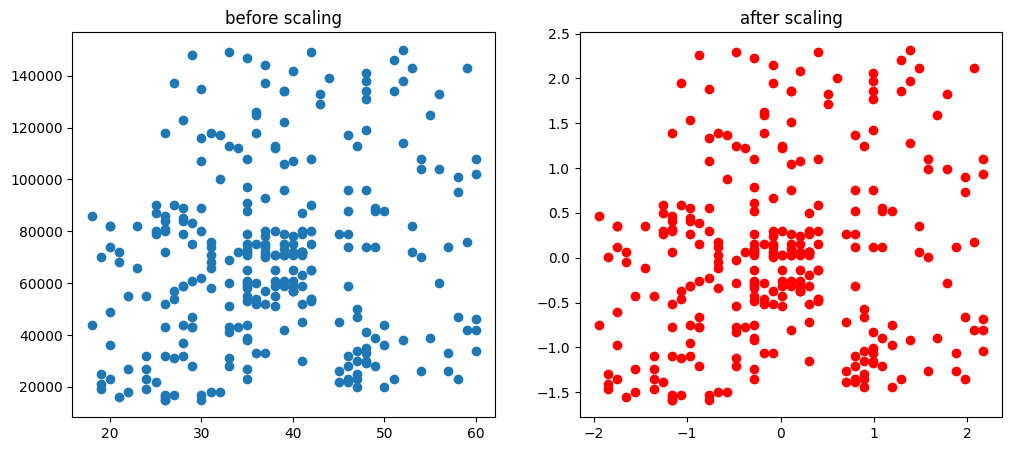

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('after scaling')


plt.show()

Their is no change in relative distance between points after scaling

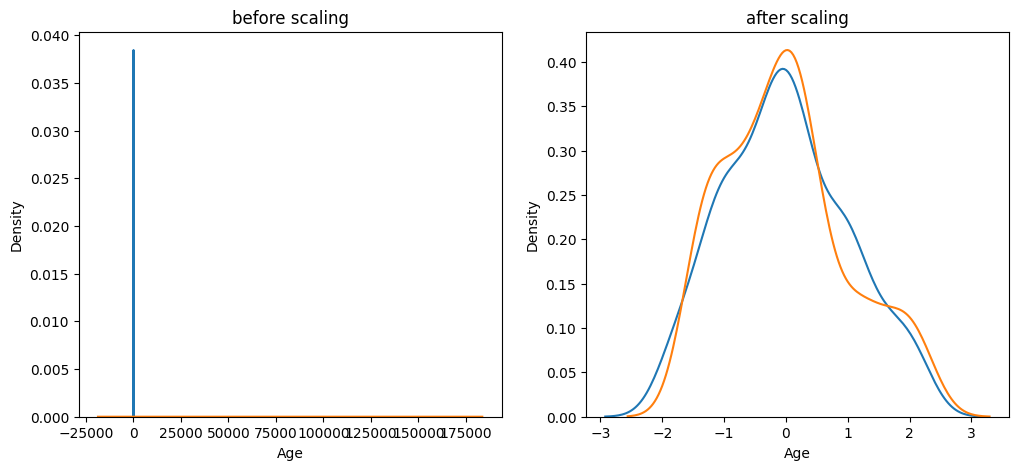

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scaling
ax1.set_title('before scaling')
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

#after scaling
ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)

plt.show()

**Difference between accuracy score!! due to scaling**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()          #for normal
lr_scaled = LogisticRegression()   #for scaled
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
